In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera.csv")

In [3]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,...,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


Try without pre processing

In [4]:
df.describe()

,Ticket Number,NPI,Case Count
count,10357.000000,1.035700e+04,10357.0
mean,213621.134402,1.517730e+09,1.0
std,61672.060597,2.808536e+08,0.0
min,104452.000000,1.003002e+09,1.0
25%,173660.000000,1.285067e+09,1.0
50%,200932.000000,1.538167e+09,1.0
75%,263815.000000,1.750303e+09,1.0
max,407677.000000,1.992949e+09,1.0


In [5]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [6]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [8]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'  and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return True
  elif(row['Denied Code'].strip() != '-' and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return False
  else:
    return None
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [9]:
df.describe(include=['object'])

,Ticket Number,Carrier Code,FinancialClass,CPT,NPI,Ordering Clinic,Denied Code,Provider Profile,accepted
count,10357,10357,10357,10357,10357,10357,10357,10357,6798
unique,10357,339,9,42,1437,1058,55,2,2
top,242323,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,965,5093,1710,146,146,6298,10246,4057


remove doller sign

In [10]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,...,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [11]:
df.describe()

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count
count,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.0
mean,1602.650574,44.679865,41.129217,3.550648,493.463687,707.961028,355.345011,374.690578,1.0
std,1882.231263,211.645956,208.343187,40.978363,1215.058115,1478.907449,1066.710826,1006.419773,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3900.000000,0.000000,0.000000,0.000000,105.000000,250.000000,112.300000,208.090000,1.0
max,14697.000000,4600.000000,4600.000000,1590.000000,12737.000000,12737.000000,14697.000000,7200.000000,1.0


In [12]:
df.describe(include=['object'])

,Ticket Number,Carrier Code,FinancialClass,CPT,NPI,Ordering Clinic,Denied Code,Provider Profile,accepted
count,10357,10357,10357,10357,10357,10357,10357,10357,6798
unique,10357,339,9,42,1437,1058,55,2,2
top,242323,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,965,5093,1710,146,146,6298,10246,4057


In [13]:
df.to_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera_last_week_process_data.csv")

In [14]:
df.shape

(10357, 22)

In [15]:
df.isnull().sum()

Ticket Number           0
Date of Service         0
Carrier Code            0
Charges                 0
Payments                0
Insurance Payment       0
Patient Payment         0
Writeoffs               0
FinancialClass          0
CPT                     0
Date of Entry           0
Payment Post Date    3559
NPI                     0
Ordering Clinic         0
Denied Code             0
First Billed Date     258
Provider Profile        0
Insurance Bal           0
Patient Bal             0
Allowed Amount          0
Case Count              0
accepted             3559
dtype: int64

In [16]:
charges = df['Charges']

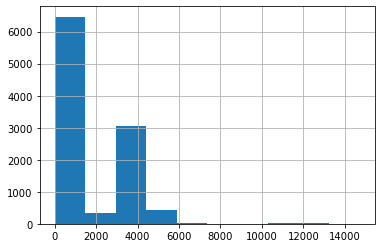

In [17]:
charges.hist()

In [18]:
charges.describe()

count    10357.000000
mean      1602.650574
std       1882.231263
min         10.000000
25%        175.000000
50%        250.000000
75%       3900.000000
max      14697.000000
Name: Charges, dtype: float64

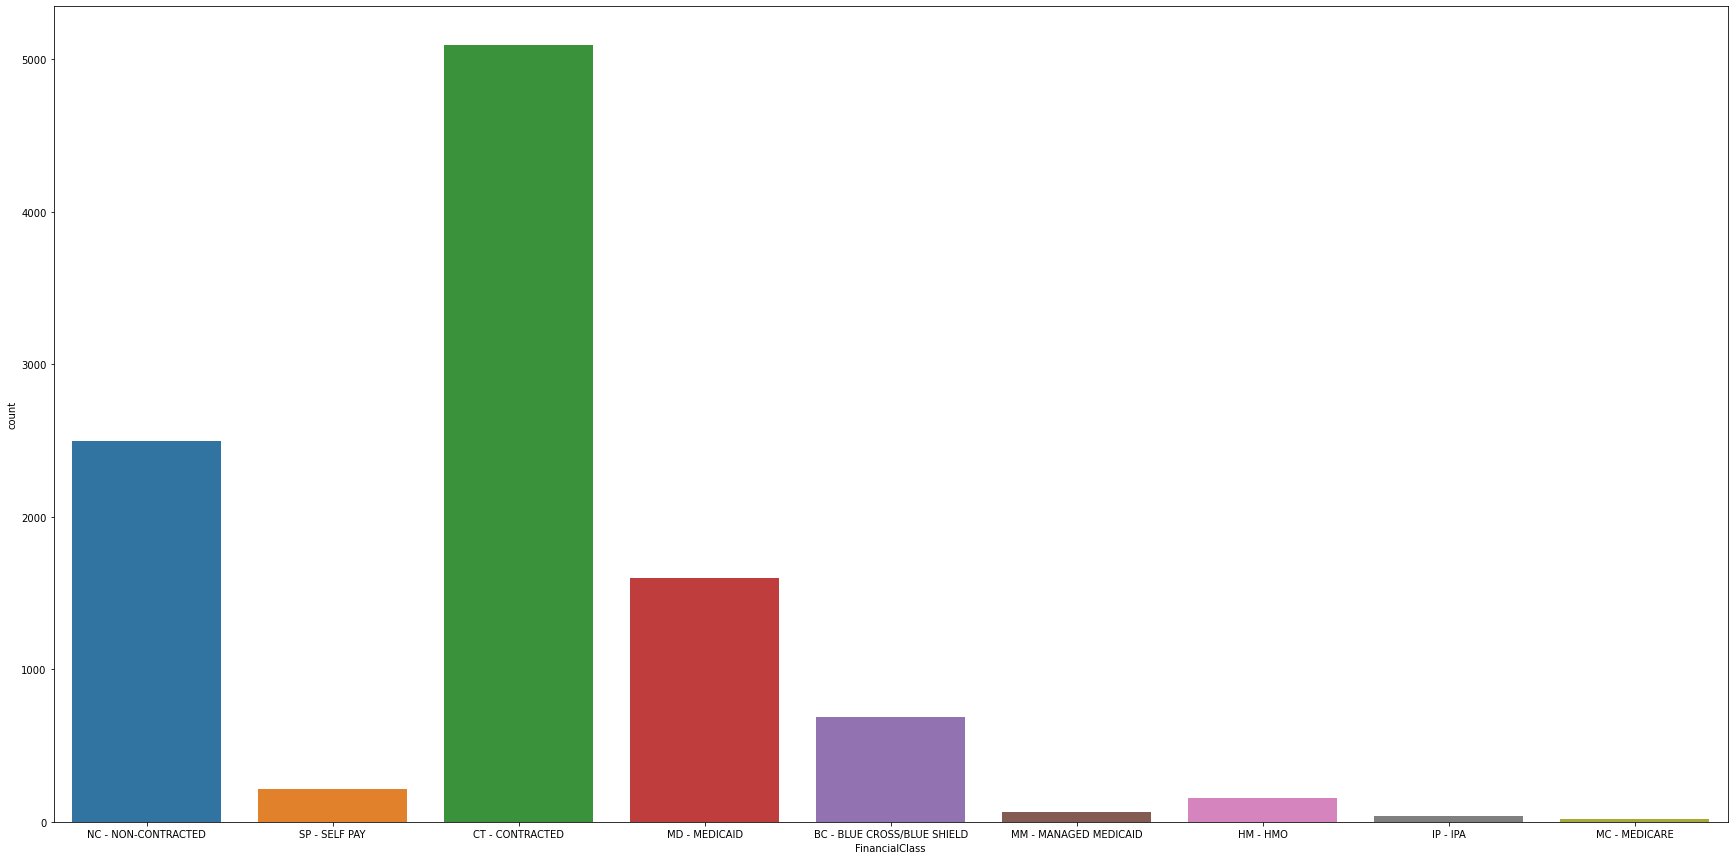

In [19]:
plt.figure(figsize=(30,15))
sns.countplot(df['FinancialClass'])

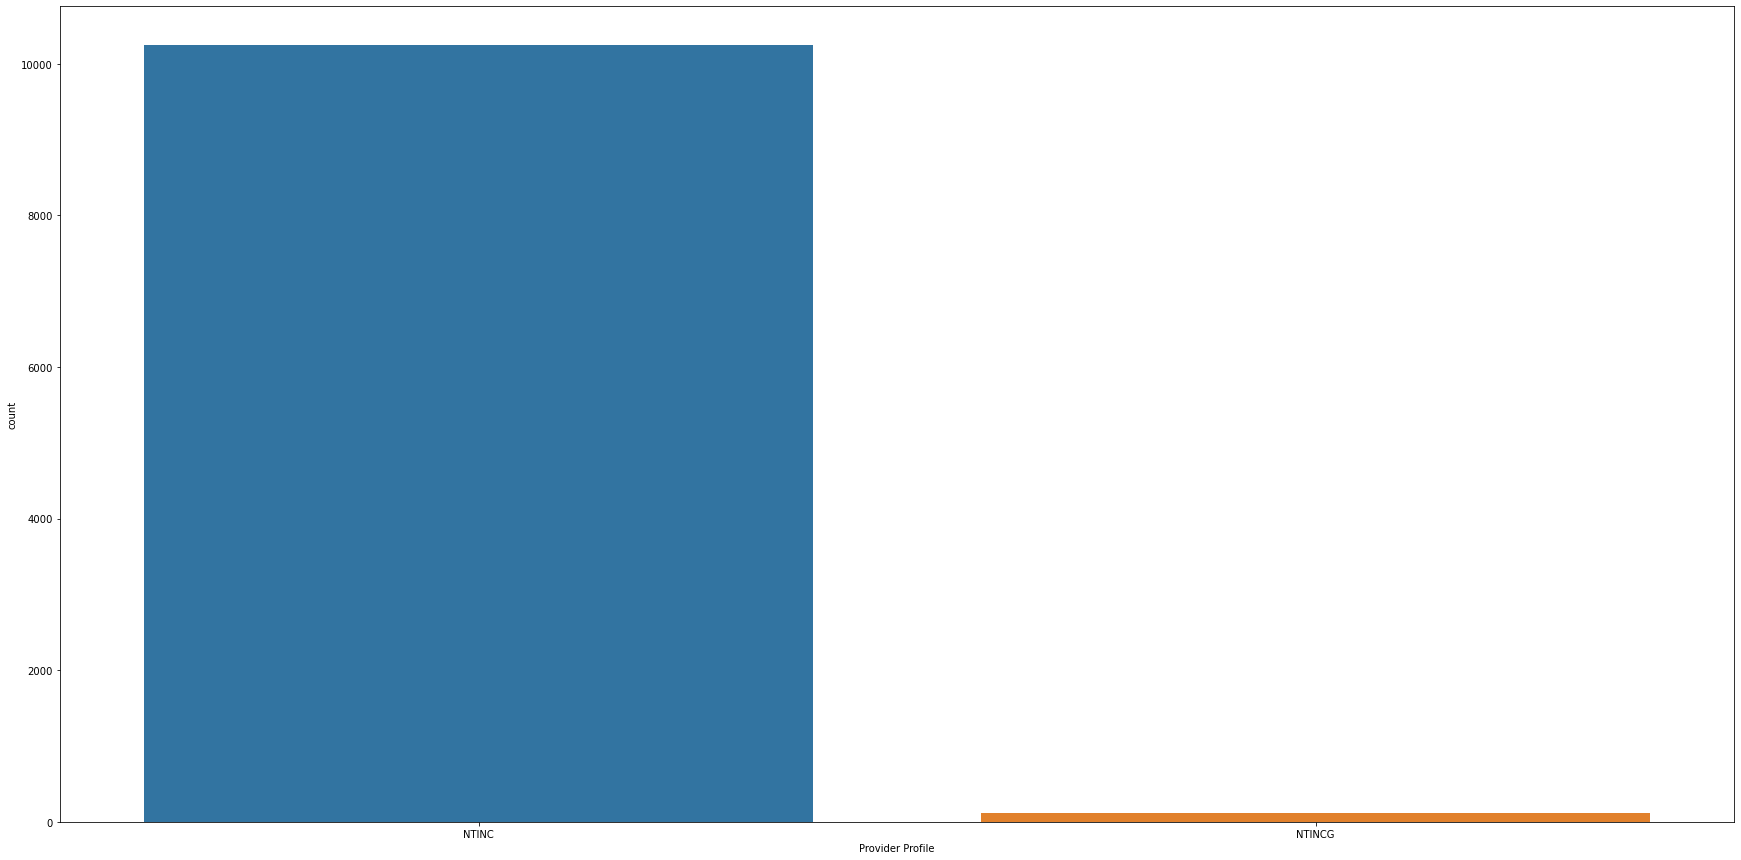

In [20]:
plt.figure(figsize=(30,15))
sns.countplot(df['Provider Profile'])

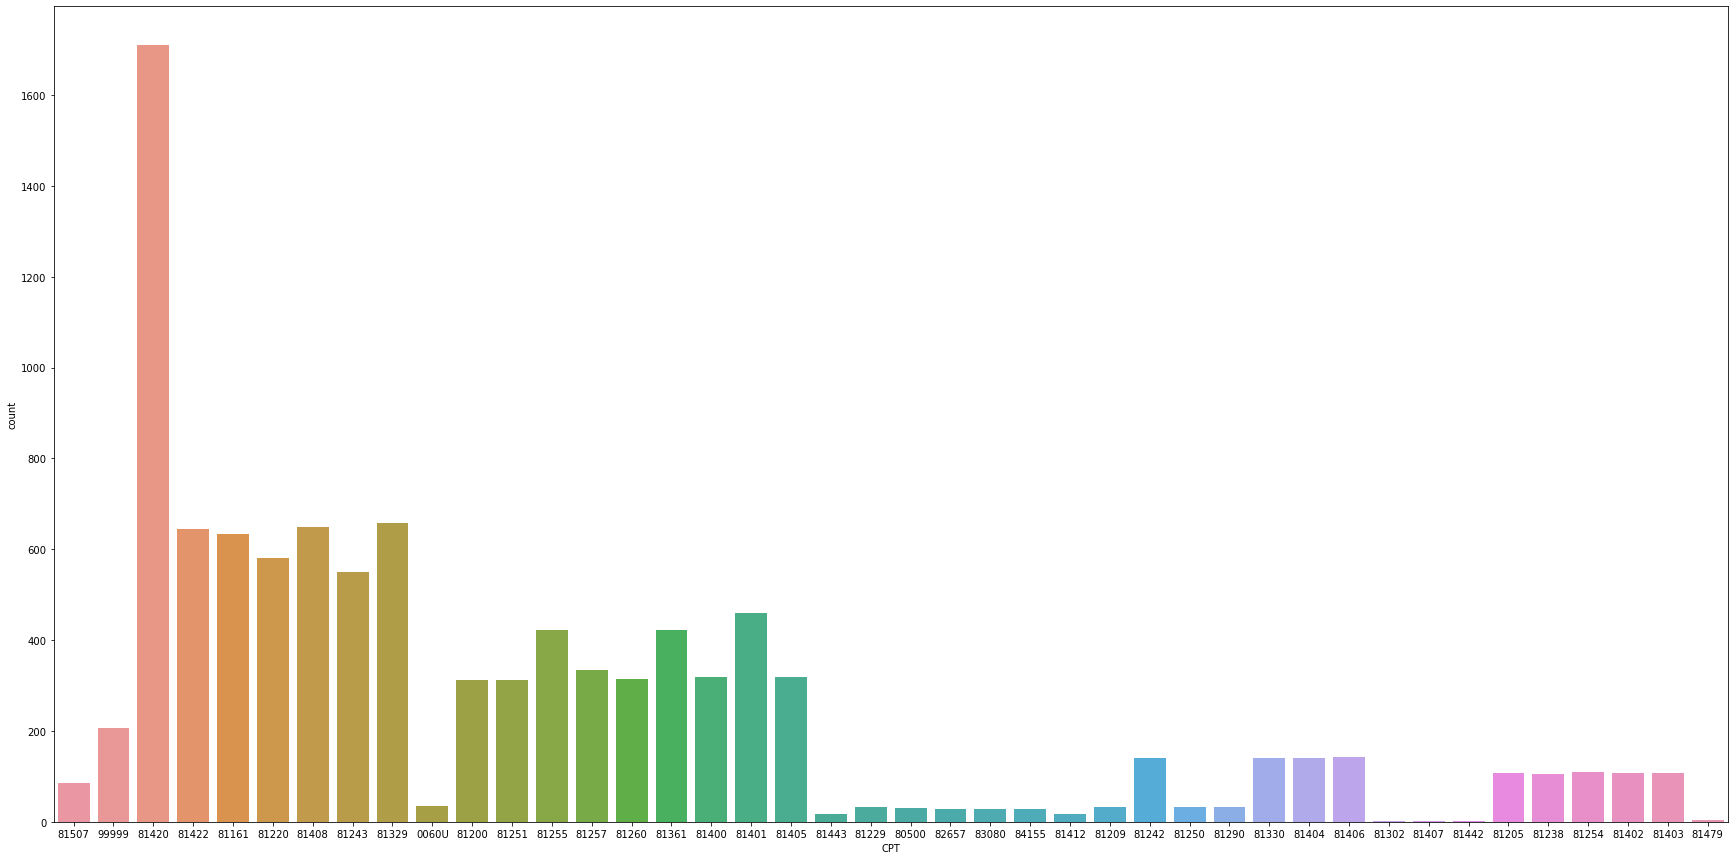

In [21]:
plt.figure(figsize=(30,15))
sns.countplot(df['CPT'])

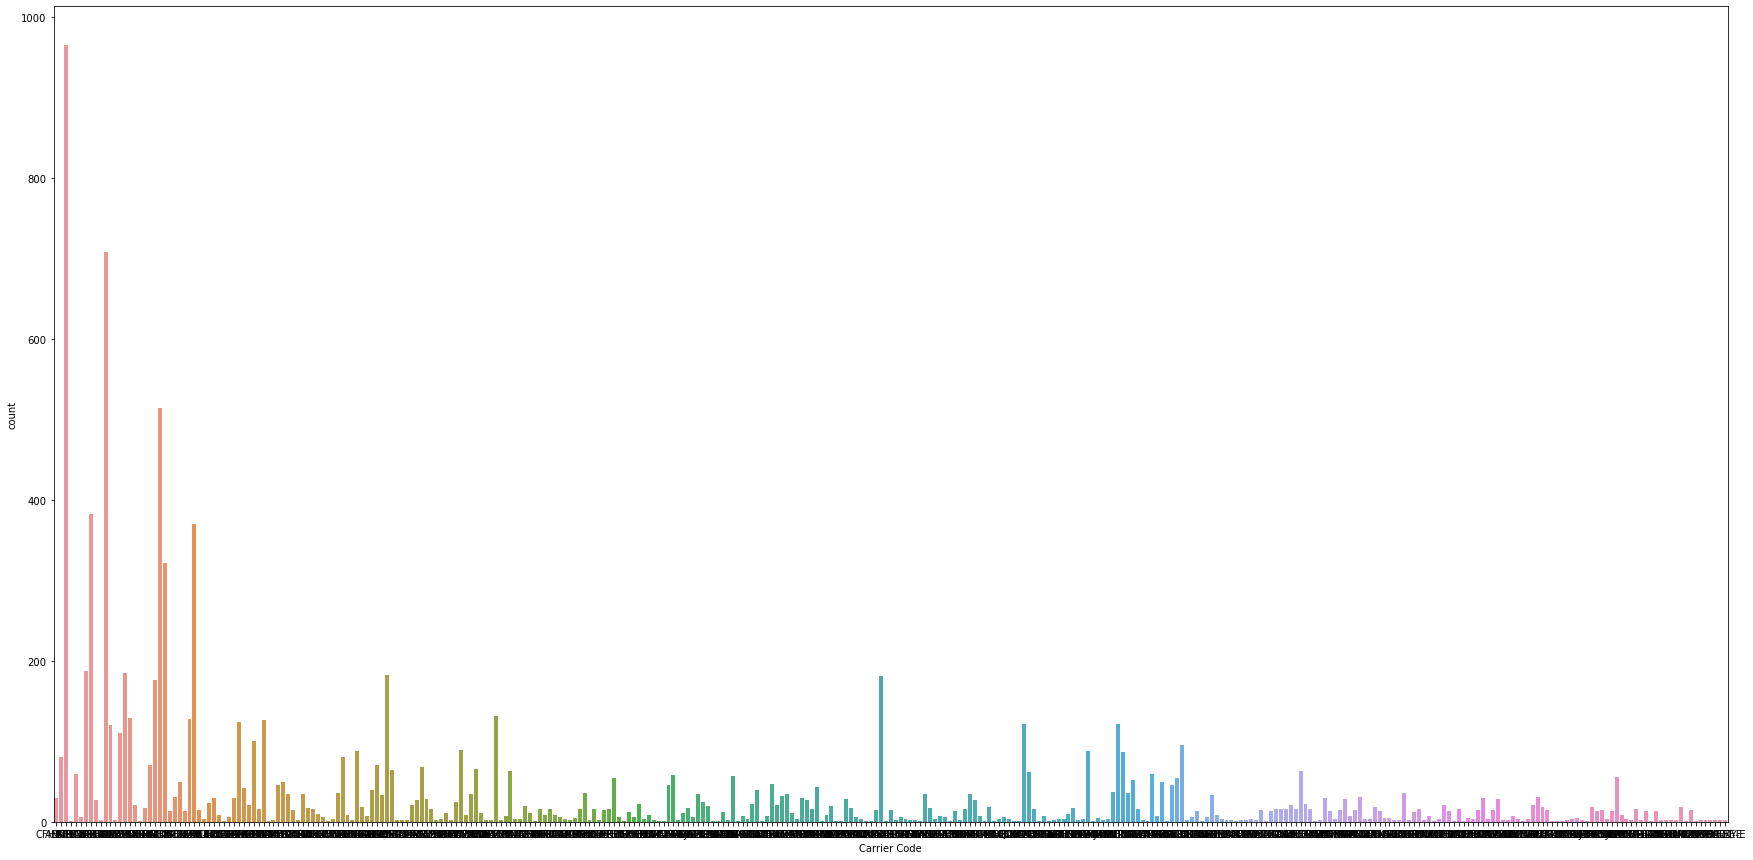

In [22]:
plt.figure(figsize=(30,15))
sns.countplot(df['Carrier Code'])

In [52]:
df = df.drop(['Case Count', 'Ticket Number'], axis=1)

In [53]:
df.head()

,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,accepted
0,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-22,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,False
1,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-24,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,False
2,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,2019-01-07,2019-02-10,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,True
3,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-28,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,True
4,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-30,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,True


In [54]:
charges.head()

0    3900.0
1    3900.0
2     795.0
3    3900.0
4    3900.0
Name: Charges, dtype: float64

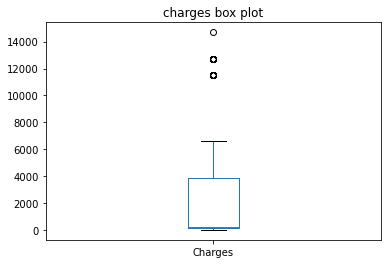

In [55]:
charges.plot(kind='box', title='charges box plot')

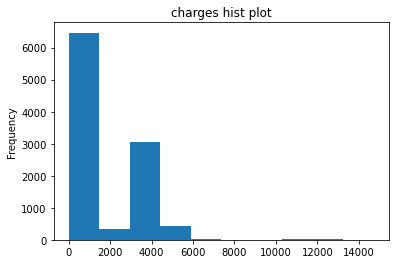

In [56]:
charges.plot(kind='hist', title='charges hist plot')

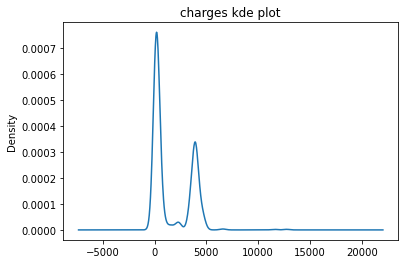

In [57]:
charges.plot(kind='kde', title='charges kde plot')

In [58]:
payments=df['Payments']

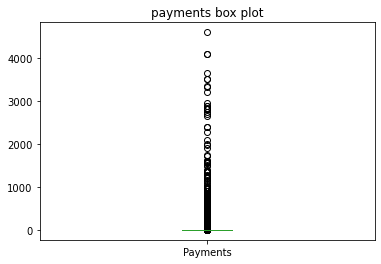

In [59]:
payments.plot(kind='box', title='payments box plot')

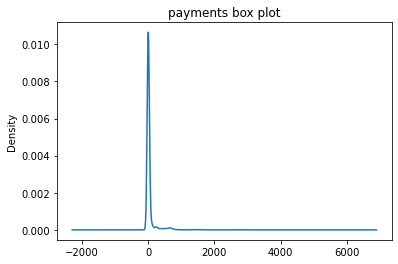

In [60]:
payments.plot(kind='kde', title='payments box plot')

In [61]:
financialClass=df['FinancialClass']

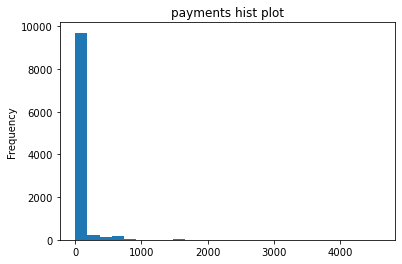

In [62]:
payments.plot(kind='hist',bins=25, title='payments hist plot')

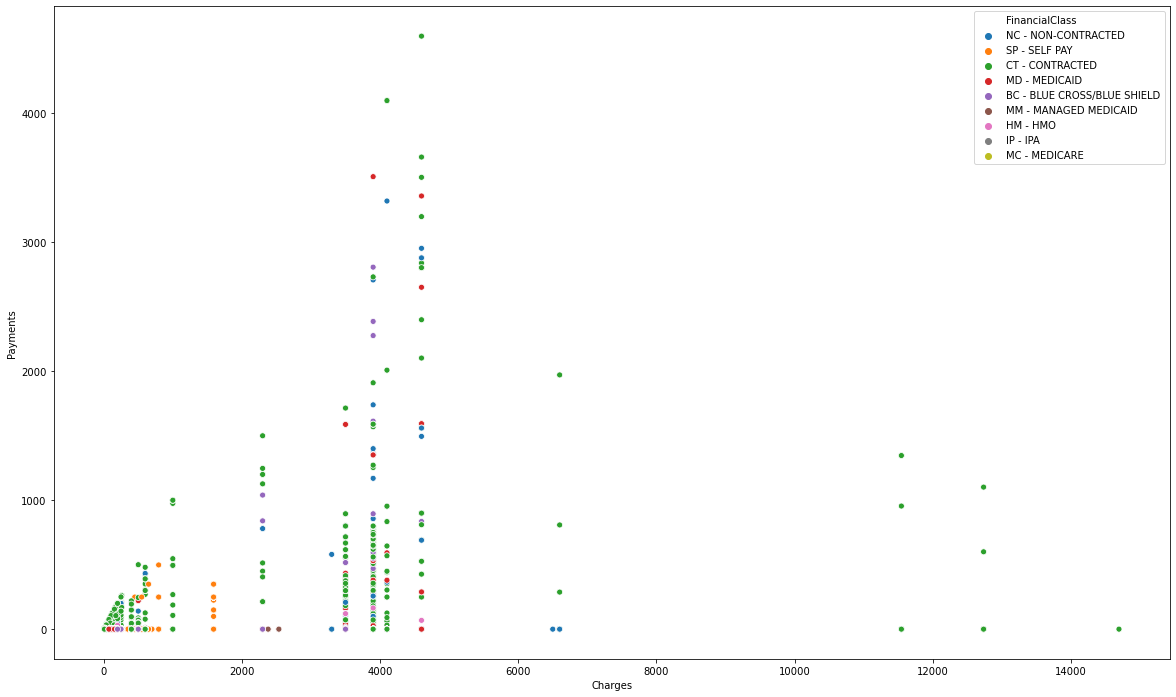

In [63]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=charges, y=payments, hue=financialClass,data=df)

In [64]:
df_cov = df.cov()

In [65]:
df_cov

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount
Charges,3.542795e+06,83070.761901,77914.908654,5155.853248,1.125465e+06,1.556659e+06,7.726039e+05,-1.358508e+05
Payments,8.307076e+04,44794.010886,43260.834088,1533.176798,8.086815e+04,-3.086940e+04,-8.579461e+03,7.071249e+04
Insurance Payment,7.791491e+04,43260.834088,43406.883556,-146.049468,7.384660e+04,-2.852814e+04,-7.430181e+03,7.058909e+04
Patient Payment,5.155853e+03,1533.176798,-146.049468,1679.226266,7.021550e+03,-2.341254e+03,-1.149280e+03,1.234002e+02
Writeoffs,1.125465e+06,80868.151711,73846.601570,7021.550141,1.476366e+06,-3.455519e+05,-9.522516e+04,9.152176e+04
Insurance Bal,1.556659e+06,-30869.395056,-28528.141353,-2341.253703,-3.455519e+05,2.187167e+06,-2.515941e+05,-2.303685e+05
Patient Bal,7.726039e+05,-8579.461261,-7430.181446,-1149.279815,-9.522516e+04,-2.515941e+05,1.137872e+06,-6.198241e+04
Allowed Amount,-1.358508e+05,70712.485320,70589.085109,123.400211,9.152176e+04,-2.303685e+05,-6.198241e+04,1.012881e+06


In [66]:
df_cor= df.corr()
df_cor

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount
Charges,1.000000,0.208528,0.198686,0.066846,0.492110,0.559216,0.384802,-0.071715
Payments,0.208528,1.000000,0.981083,0.176778,0.314464,-0.098623,-0.038002,0.331976
Insurance Payment,0.198686,0.981083,1.000000,-0.017107,0.291712,-0.092588,-0.033433,0.336650
Patient Payment,0.066846,0.176778,-0.017107,1.000000,0.141020,-0.038633,-0.026292,0.002992
Writeoffs,0.492110,0.314464,0.291712,0.141020,1.000000,-0.192298,-0.073470,0.074842
Insurance Bal,0.559216,-0.098623,-0.092588,-0.038633,-0.192298,1.000000,-0.159482,-0.154776
Patient Bal,0.384802,-0.038002,-0.033433,-0.026292,-0.073470,-0.159482,1.000000,-0.057735
Allowed Amount,-0.071715,0.331976,0.336650,0.002992,0.074842,-0.154776,-0.057735,1.000000


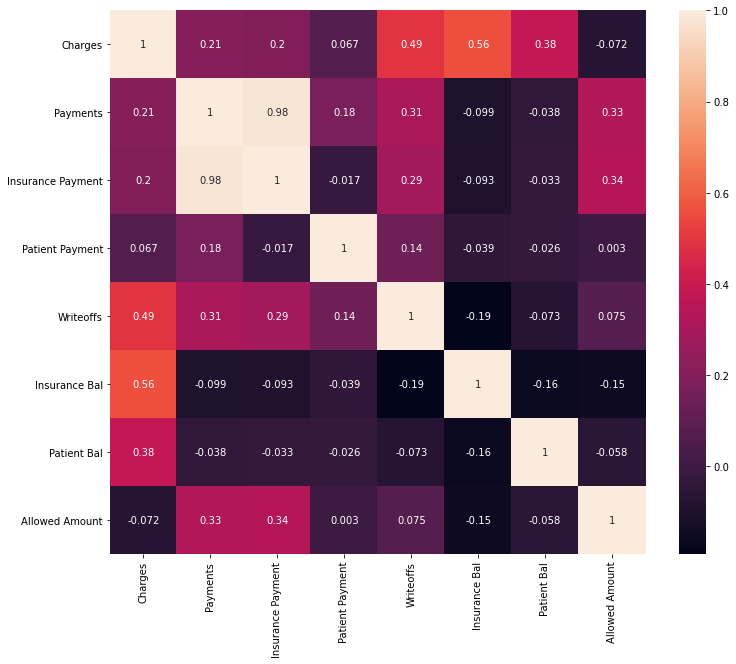

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(df_cor,annot=True)

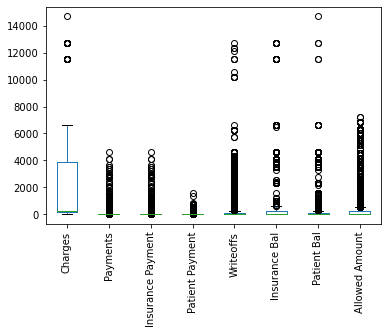

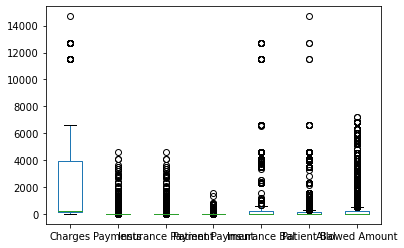

In [76]:
boxplot = df.boxplot(grid=False, rot=90, fontsize=10)
plot_val= ['Charges','Payments', 'Insurance Payment', 'Patient Payment', 'Insurance Bal', 'Patient Bal','Allowed Amount']
df[plot_val].plot(kind='box')

In [83]:
fig = plt.figure(figsize = (15,20),title='frequency')
ax = fig.gca()
   
histplot = df.hist(ax = ax)

TypeError: __init__() got an unexpected keyword argument 'title'